In [1]:
import numpy as np
import pandas as pd

### Read Data from Excel with given 20 columns

In [3]:
Data= pd.read_csv('netflix_titles.csv') # give path to your file
print ("Shape of dataframe : ", Data.shape)
print("Columns Name : \n",Data.columns)

Shape of dataframe :  (6234, 12)
Columns Name : 
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


### Data Aquisition and Cleaning 

In [5]:
# 2- Display first 5 rows of Data
Data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [6]:
# 3- Display last 5 records of Data
Data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


In [7]:
# 4- Drop Redundant columns in data (e.g description) 


del Data['description']


print ("Shape of dataframe : ", Data.shape)


Shape of dataframe :  (6234, 11)


In [8]:
## 5- Find Missing Values

MissingValues=np.where (Data.isna())

# Missing Rows of Data
MissingRows=np.array(MissingValues[0])
print("Missing values in following rows of Data: \n",MissingRows)
print("Total unique rows with missing values:  12")

# 6- Drop records of missing values
Data=Data.dropna(axis=0,thresh=5)
print("New Shape of Data after removing missing values : ",Data.shape)


Missing values in following rows of Data: 
 [   1    2    3 ... 6232 6233 6233]
Total unique rows with missing values:  12
New Shape of Data after removing missing values :  (6234, 11)


In [9]:
# 7- Find Duplicate records in Data 
duplicatedValues= Data.duplicated()
Y=np.where (duplicatedValues==True)
len(Y[0])
# There sre no dupliacte records in given Graduates Data

0

## Q1- Data Analysis using statistical methods

#### Q1- Most number of releases per year and director with most movies in a year

In [11]:
# Most number of releases per year
release_counts = Data['release_year'].value_counts()

# Find the year with the highest number of releases
max_year = release_counts.idxmax() 
max_releases = release_counts.max()

print(f"Year with most releases: {max_year} ({max_releases} releases)")

# Count the number of movies per director
director_counts = Data['director'].value_counts()

# Get the director with the most movies
most_director = director_counts.idxmax()
most_movies = director_counts.max()

print(f"Director with most movies: {most_director} ({most_movies} movies)")

Year with most releases: 2018 (1063 releases)
Director with most movies: Raúl Campos, Jan Suter (18 movies)


### 2 , 3- Data Analysis using conditional filtering with more than one condition.

##### Q2 Find all movies directed by a specific director in a given year

In [14]:
X = Data[(Data['director'] == 'Christopher Nolan') & (Data['release_year'] == 2010)]
print("All movies directed by Nolan in year 2010:")
print(X)

All movies directed by Nolan in year 2010:
       show_id   type      title           director  \
3524  70131314  Movie  Inception  Christopher Nolan   

                                                   cast  \
3524  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...   

                            country       date_added  release_year rating  \
3524  United States, United Kingdom  January 1, 2020          2010  PG-13   

     duration                                        listed_in  
3524  148 min  Action & Adventure, Sci-Fi & Fantasy, Thrillers  


##### Q3 Find movies of a particular genre and duration greater than a certain value

In [17]:
# Filter only movies (TV Shows have 'Season' instead of minutes)
movies_data = Data[Data['type'] == 'Movie'].copy()

# Convert duration column to numeric (removing ' min')
movies_data['duration'] = movies_data['duration'].str.replace(' min', '', regex=False).astype(float)

# Filter comedy movies longer than 100 minutes
filtered_data = movies_data[(movies_data['listed_in'].str.contains('Comedy', na=False)) & (movies_data['duration'] > 100)]

print("All comedy movies longer than 100 minutes:")
print(filtered_data)


All comedy movies longer than 100 minutes:
       show_id   type                                        title  \
1593  80213024  Movie               Dany Boon: Des Hauts De France   
2676  80168221  Movie                        Oh, Hello On Broadway   
3586  60001854  Movie                 The Original Kings of Comedy   
4265  70298389  Movie  Tim Minchin And The Heritage Orchestra Live   
4266  81045530  Movie                 Tim Minchin: So F**king Rock   
4629  60024161  Movie              Martin Lawrence Live: Runteldat   

                 director                                               cast  \
1593       Isabelle Nanty                                          Dany Boon   
2676  Michael John Warren                           Nick Kroll, John Mulaney   
3586            Spike Lee  Steve Harvey, D.L. Hughley, Cedric the Enterta...   
4265           Matt Askem                         Tim Minchin, Jules Buckley   
4266           Matt Askem                                        T

### 4,5-  Data Analysis using group the data by column(s)

##### Q4- Which country produces the most content on Netflix?

In [20]:
# Grouping movies based on countries and then sorting them according to their count
country_counts = Data.groupby('country').size().reset_index(name='count')
print(country_counts.sort_values(by='count', ascending=False).head(10))

            country  count
443   United States   2032
194           India    777
379  United Kingdom    348
249           Japan    176
51           Canada    141
327     South Korea    136
334           Spain    117
133          France     90
259          Mexico     83
367          Turkey     79


#### Q5- What is the average duration of movies in each genre?

In [22]:
# What is the average duration of movies in each genre?
movies_data = Data[Data['type'] == 'Movie'].copy()
movies_data['duration'] = movies_data['duration'].str.replace(' min', '', regex=False).astype(float)

genre_duration = movies_data.groupby('listed_in')['duration'].mean().reset_index()
print(genre_duration.sort_values(by='duration', ascending=False).head(10))


                                             listed_in    duration
28             Action & Adventure, Cult Movies, Dramas  172.000000
16   Action & Adventure, Classic Movies, Internatio...  166.000000
203            Dramas, Music & Musicals, Sports Movies  157.000000
101                Classic Movies, Cult Movies, Dramas  154.000000
109            Classic Movies, Dramas, Romantic Movies  153.666667
106       Classic Movies, Dramas, International Movies  148.666667
47   Action & Adventure, International Movies, Musi...  142.800000
14     Action & Adventure, Classic Movies, Cult Movies  139.500000
232  International Movies, Music & Musicals, Romant...  138.600000
15          Action & Adventure, Classic Movies, Dramas  138.500000


### 6,7- Data Analysis using combination of sorting, condition filter and/or grouping.

##### Q6. Which year had the highest number of Comedy movies longer than 100 minutes?

In [24]:
# Filter only Movies
movies_data = Data[Data['type'] == 'Movie'].copy()

# Remove " min" and convert duration to float
movies_data['duration'] = movies_data['duration'].str.replace(' min', '', regex=False).astype(float)

# Filter only Comedy movies longer than 100 minutes
comedy_movies = movies_data[(movies_data['listed_in'].str.contains('Comedy', na=False)) & (movies_data['duration'] > 100)]

# Group by release year and count
yearly_comedy_counts = comedy_movies.groupby('release_year').size().reset_index(name='count')

# Sort by count in descending order
print(yearly_comedy_counts.sort_values(by='count', ascending=False).head(10))


   release_year  count
0          2000      1
1          2002      1
2          2008      1
3          2011      1
4          2017      1
5          2018      1


##### Q7. Who are the top 5 directors with the highest number of movies in the Drama genre?

In [26]:
# Filter Drama movies
drama_movies = Data[(Data['type'] == 'Movie') & (Data['listed_in'].str.contains('Drama', na=False))]

# Count movies per director
director_counts = drama_movies['director'].value_counts().reset_index()
director_counts.columns = ['Director', 'Count']

# Sort and display top 5 directors
print(director_counts.head(5))


              Director  Count
0      Martin Scorsese      8
1       S.S. Rajamouli      7
2  Cathy Garcia-Molina      6
3          Omoni Oboli      5
4        Noah Baumbach      5


### 8,9,10,11- Visualize data using a chart with proper headings and legends.

##### Q8-Line Chart: Trend of Comedy Movies Released Over Time

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

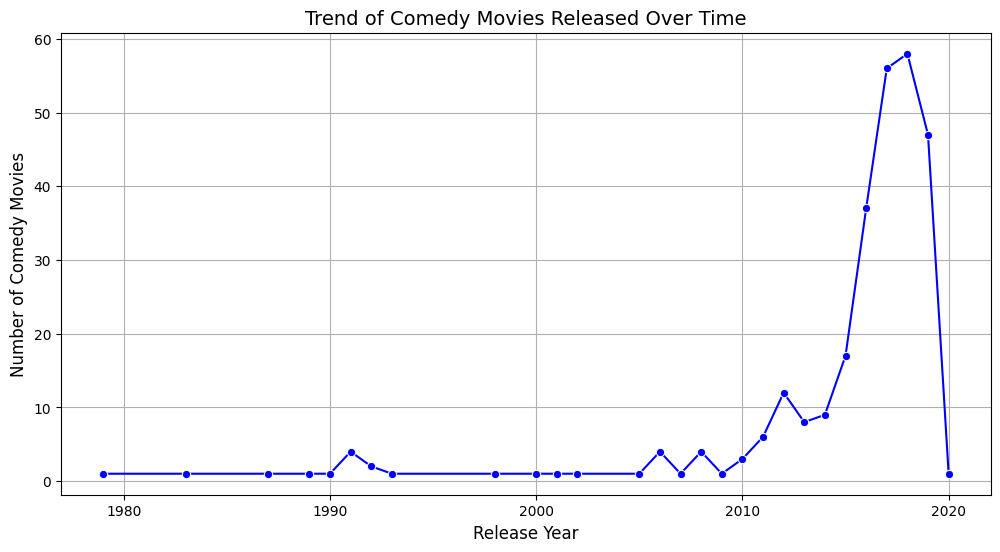

In [29]:
# Filter Comedy Movies
comedy_movies = Data[(Data['type'] == 'Movie') & (Data['listed_in'].str.contains('Comedy', na=False))]

# Count movies per year
comedy_trend = comedy_movies.groupby('release_year').size().reset_index(name='count')

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='count', data=comedy_trend, marker='o', color='b')

# Titles and labels
plt.title("Trend of Comedy Movies Released Over Time", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Comedy Movies", fontsize=12)
plt.grid(True)

# Show the chart
plt.show()



##### Q9- Pie Chart: Distribution of Content Type (Movies vs. TV Shows)

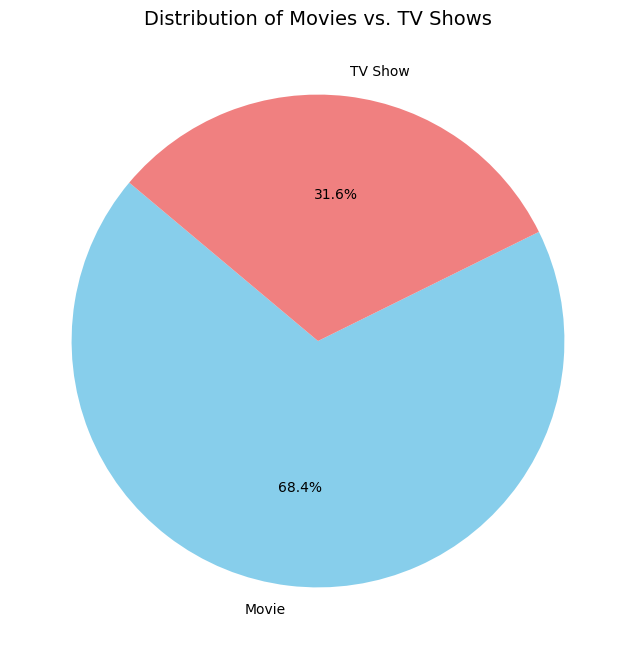

In [31]:
# Count Movies and TV Shows
type_counts = Data['type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)

# Titles
plt.title("Distribution of Movies vs. TV Shows", fontsize=14)

# Show the chart
plt.show()


##### Q10  Horizontal Bar Chart: Top 10 Countries with the Most Content

C:\Users\Dell\AppData\Local\Temp\ipykernel_12556\2236301399.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Country', data=country_counts, palette='coolwarm')


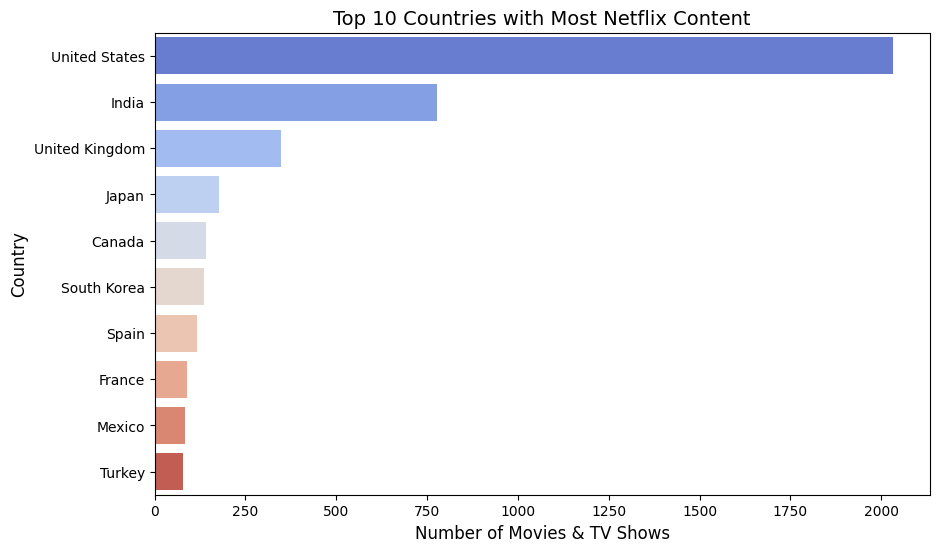

In [32]:
# Count movies and TV shows per country
country_counts = Data['country'].value_counts().reset_index().head(10)
country_counts.columns = ['Country', 'Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Country', data=country_counts, palette='coolwarm')

# Titles and labels
plt.title("Top 10 Countries with Most Netflix Content", fontsize=14)
plt.xlabel("Number of Movies & TV Shows", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Show the chart
plt.show()


#### Q11- Box Plot: Distribution of Movie Durations by Genre

C:\Users\Dell\AppData\Local\Temp\ipykernel_12556\1591893855.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='listed_in', y='duration', data=movies_subset, palette='Set2')


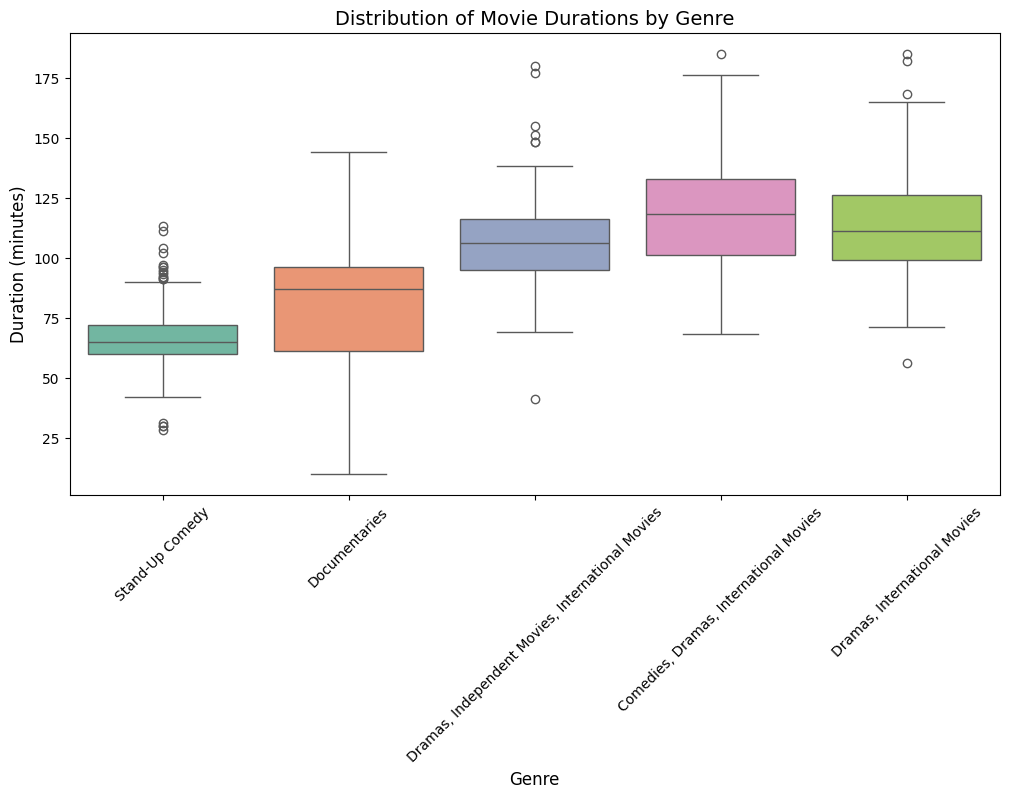

In [34]:
# Filter only Movies
movies_data = Data[Data['type'] == 'Movie'].copy()

# Convert duration column
movies_data['duration'] = movies_data['duration'].str.replace(' min', '', regex=False).astype(float)

# Select top 5 most common genres
top_genres = movies_data['listed_in'].value_counts().head(5).index
movies_subset = movies_data[movies_data['listed_in'].isin(top_genres)]

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='listed_in', y='duration', data=movies_subset, palette='Set2')

# Titles and labels
plt.title("Distribution of Movie Durations by Genre", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Duration (minutes)", fontsize=12)
plt.xticks(rotation=45)

# Show the chart
plt.show()
